<a href="https://colab.research.google.com/github/chl-eo/CCMACLRL_EXERCISES_COM221/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [360]:
import sklearn

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [359]:
df = pd.read_excel('personality.xlsx')

In [361]:
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Margarete,0,0,1,147,0
1,Allana,0,0,1,41,0
2,Louisse,0,1,1,250,1
3,Rovilyn,0,1,1,31,1
4,Christian,0,1,1,73,1


1. Display the summary of all the features of the dataset using `.info()`

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


In [363]:
df.drop(columns='Name', inplace=True)

2. Display the total number of samples from each label using `.value_counts()`

In [364]:
df['Post/Share Frequently?'].value_counts()

,count
Post/Share Frequently?,
1,28
0,22


In [365]:
df['Active in social media?'].value_counts()

,count
Active in social media?,
1,43
0,7


In [366]:
df['Replies to comments?'].value_counts()


,count
Replies to comments?,
1,43
0,7


In [367]:
df['Number of friends/followers'].value_counts()


,count
Number of friends/followers,
211,2
147,1
200,1
309,1
451,1
664,1
320,1
298,1
346,1


In [368]:
df['Personality'].value_counts()


,count
Personality,
1,39
0,11


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [369]:
X = df.drop(columns=['Personality']).values

print(X.shape)
print(X.ndim)

(50, 4)
2


In [370]:
y = df['Personality'].values

print(y.shape)
print(y.ndim)

(50,)
1


4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [562]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)


In [557]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 4)
(40,)
(10, 4)
(10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [563]:
knn = KNeighborsClassifier(n_neighbors=10)

7. Train the model using the `.fit()`

In [565]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

8. Test the model using the `.predict()`

In [566]:
y_pred = knn.predict(X_test)


## Evaluate the model

9. Create a confusion matrix

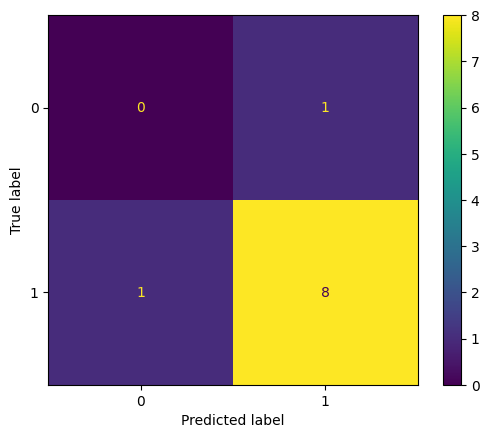

In [567]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

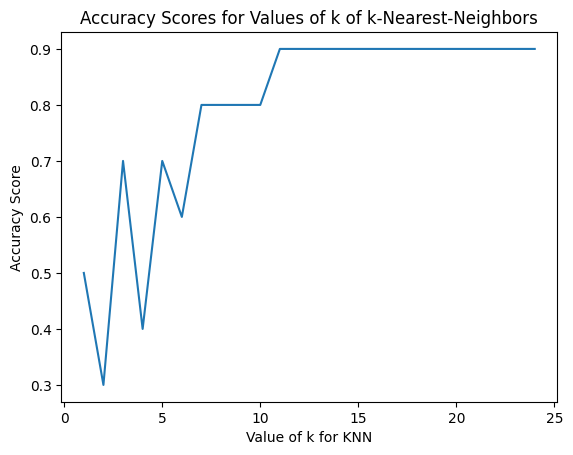

In [568]:
k_range = list(range(1,25))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

10. Display the accuracy

In [569]:
metrics.accuracy_score(y_test, y_pred)

0.9

11. Display the precision

In [570]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.  0.9]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


12. Display the recall

In [571]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0. 1.]


13. Display the f1-score

In [572]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.         0.94736842]


In [574]:
knn.predict([[1, 1, 0, 187]])

array([1])